In [1]:
import datetime
from pathlib import Path
import atomic as atom
import definitions as defs
import visuals as vis 

from ta.volatility import BollingerBands
from ta.trend import MACD
from ta.momentum import RSIIndicator
from ta.trend import IchimokuIndicator
from ta.trend import EMAIndicator
from ta.trend import SMAIndicator
from ta.trend import ADXIndicator
from ta.volatility import KeltnerChannel

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [25]:
def getOPData(date, EnterTime):
    Banknifty_Path = "../NIFTYOptionsData/OptionsData/Banknifty/"
    Nifty_Path = "../NIFTYOptionsData/OptionsData/Nifty/"
    date_string = date.strftime("%Y/Data%Y%m%d.csv")
    BNPath = Banknifty_Path + date_string
    NPath = Nifty_Path + date_string
    my_fileN = Path(NPath)
    my_fileBN = Path(BNPath)
    # print("Working on file - "+date_string)
    if my_fileN.exists() and my_fileBN.exists():
      masterdfN = atom.LoadDF(NPath)
      masterdfBN = atom.LoadDF(BNPath)
    masterdf = masterdfBN

    symbol = defs.BN
    spotdata = atom.GetSpotData(masterdf, defs.BN)
    for s in range(len(spotdata)):
        currentcandle = spotdata.iloc[s]
        if currentcandle.name.time() == EnterTime:
            exp = atom.GetExpiry(masterdf, symbol)
            if symbol == defs.N :
                cst = currentcandle["open"]
                cst = int(round(cst / 50, 0)*50)
            elif symbol == defs.BN :
                cst = currentcandle["open"]
                cst = int(round(cst / 100, 0) * 100)
            opdfCE = masterdf[masterdf['symbol'] == symbol + exp + str(cst) + "CE"]
            opdfPE = masterdf[masterdf['symbol'] == symbol + exp + str(cst) + "PE"]
            break
    return (opdfCE, opdfPE)

date = datetime.date(2022, 9, 23)
EnterTime = datetime.time(9,16)
(opdfCE, opdfPE) = getOPData(date, EnterTime)
opdfCE

/Users/rishabhiyer/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,datetime,close,date,high,low,oi,open,symbol,time,volume
datetime,,,,,,,,,,
2022-09-23 09:15:00,2022-09-23 09:15:00,507.65,2022-09-23,519.10,460.00,784875.0,500.65,BANKNIFTY29SEP2240500CE,09:15:00,738703
2022-09-23 09:16:00,2022-09-23 09:16:00,445.55,2022-09-23,506.60,443.40,784875.0,506.60,BANKNIFTY29SEP2240500CE,09:16:00,498675
2022-09-23 09:17:00,2022-09-23 09:17:00,430.95,2022-09-23,438.90,419.40,1255250.0,437.00,BANKNIFTY29SEP2240500CE,09:17:00,441950
2022-09-23 09:18:00,2022-09-23 09:18:00,412.10,2022-09-23,428.15,410.00,1255250.0,422.60,BANKNIFTY29SEP2240500CE,09:18:00,328975
2022-09-23 09:19:00,2022-09-23 09:19:00,420.90,2022-09-23,420.90,403.80,1255250.0,408.30,BANKNIFTY29SEP2240500CE,09:19:00,264325
...,...,...,...,...,...,...,...,...,...,...
2022-09-23 15:26:00,2022-09-23 15:26:00,175.65,2022-09-23,175.65,167.20,3247300.0,167.20,BANKNIFTY29SEP2240500CE,15:26:00,99175
2022-09-23 15:27:00,2022-09-23 15:27:00,175.05,2022-09-23,178.00,174.40,3210425.0,176.20,BANKNIFTY29SEP2240500CE,15:27:00,109300
2022-09-23 15:28:00,2022-09-23 15:28:00,183.20,2022-09-23,187.75,175.45,3210425.0,175.45,BANKNIFTY29SEP2240500CE,15:28:00,211950


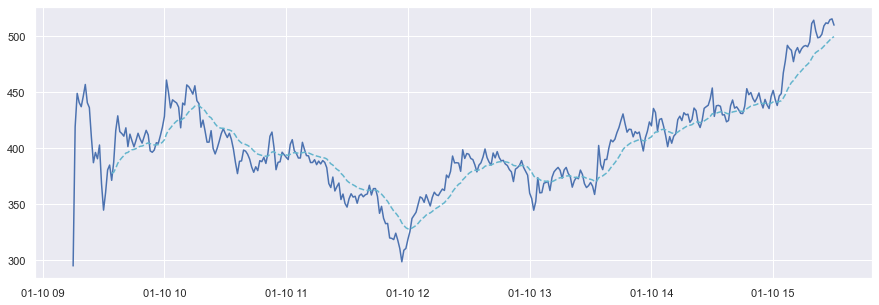

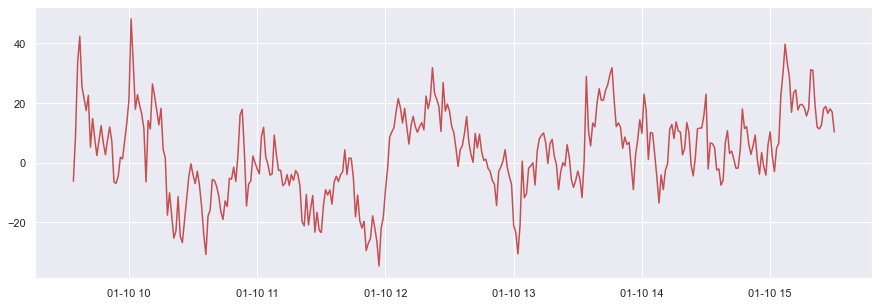

In [6]:
win = 20
SMA = SMAIndicator(opdfCE['open'], window=win)
EMA = EMAIndicator(opdfCE['open'], window=win)
opdfCE["sma"] = SMA.sma_indicator()
opdfCE["ema"] = EMA.ema_indicator()
opdfCE["madiff"] = opdfCE["open"] - opdfCE["ema"]
opdfCE.dropna()

fig = plt.figure(figsize = (15,5))
plt.plot(opdfCE[['open']],'b')
plt.plot(opdfCE["ema"],'c--')
plt.show()

fig = plt.figure(figsize = (15,5))
plt.plot(opdfCE["madiff"],'r')
plt.show()


/Users/rishabhiyer/opt/anaconda3/lib/python3.9/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/Users/rishabhiyer/opt/anaconda3/lib/python3.9/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


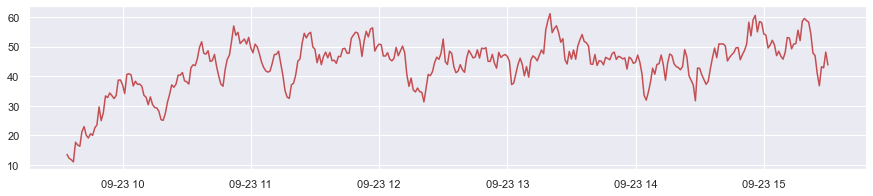

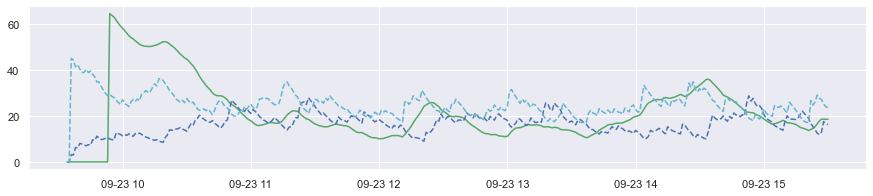

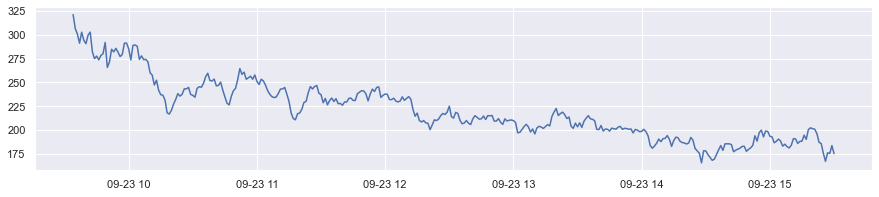

In [26]:
Rsi = RSIIndicator(opdfCE['open'], window=win)
opdfCE["rsi"] = Rsi.rsi()
Adx = ADXIndicator(opdfCE['high'], opdfCE['low'], opdfCE['close'], window = win)
opdfCE["adx"] = Adx.adx()
opdfCE["diplus"] = Adx.adx_pos()
opdfCE["diminus"] = Adx.adx_neg()
opdfCE = opdfCE.dropna()
fig = plt.figure(figsize = (15,3))
plt.plot(opdfCE["rsi"],'r')
plt.show()

fig = plt.figure(figsize = (15,3))
plt.plot(opdfCE["adx"],'g')
plt.plot(opdfCE["diplus"], 'b--')
plt.plot(opdfCE["diminus"], 'c--')
plt.show()

fig = plt.figure(figsize = (15,3))
plt.plot(opdfCE["open"],'b')
plt.show()


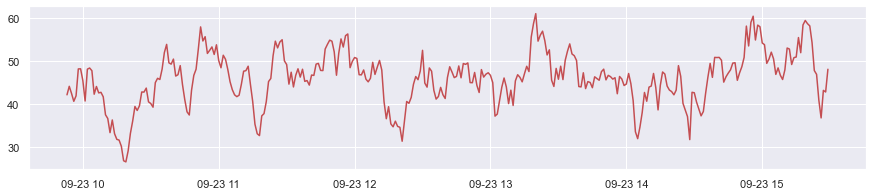

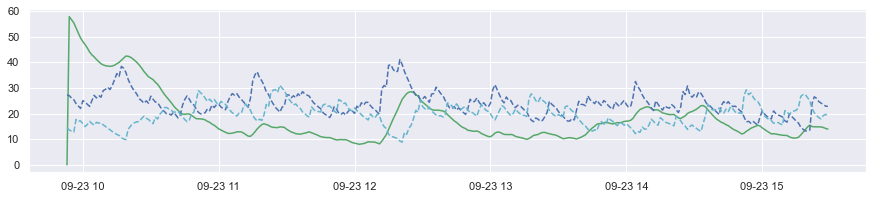

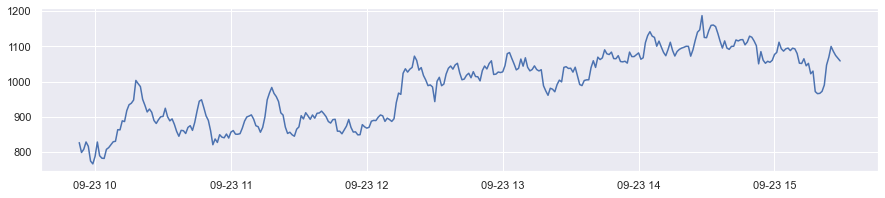

In [27]:
Rsi = RSIIndicator(opdfCE['open'], window=win)
opdfPE["rsi"] = Rsi.rsi()
Adx = ADXIndicator(opdfPE['high'], opdfPE['low'], opdfPE['close'], window = win)
opdfPE["adx"] = Adx.adx()
opdfPE["diplus"] = Adx.adx_pos()
opdfPE["diminus"] = Adx.adx_neg()
opdfPE = opdfPE.dropna()
fig = plt.figure(figsize = (15,3))
plt.plot(opdfPE["rsi"],'r')
plt.show()

fig = plt.figure(figsize = (15,3))
plt.plot(opdfPE["adx"],'g')
plt.plot(opdfPE["diplus"], 'b--')
plt.plot(opdfPE["diminus"], 'c--')
plt.show()

fig = plt.figure(figsize = (15,3))
plt.plot(opdfPE["open"],'b')
plt.show()


/var/folders/k2/z8js448j05q5m09dlcbyn6400000gp/T/ipykernel_83438/747578508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opdfCE["hbandkc"] = kc.keltner_channel_hband()
/var/folders/k2/z8js448j05q5m09dlcbyn6400000gp/T/ipykernel_83438/747578508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opdfCE["lbandkc"] = kc.keltner_channel_lband()


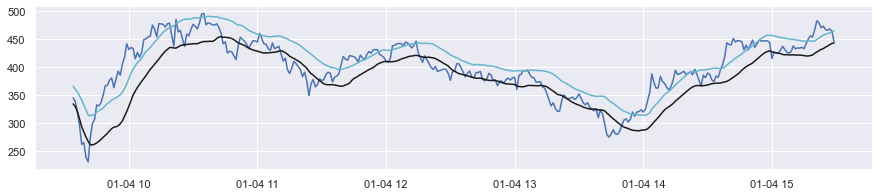

In [21]:
win = 20
window_atr = 10
kc = KeltnerChannel(opdfCE["high"], opdfCE["low"], opdfCE["close"], win, window_atr)
opdfCE["hbandkc"] = kc.keltner_channel_hband()
opdfCE["lbandkc"] = kc.keltner_channel_lband()
opdfCE = opdfCE.dropna()
fig = plt.figure(figsize = (15,3))
plt.plot(opdfCE[['close']],'b')
plt.plot(opdfCE["hbandkc"],'c')
plt.plot(opdfCE["lbandkc"],'k')
plt.show()
